# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [34]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [35]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 20
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews


In [36]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head(10)

,reviews
0,✅ Trip Verified | A simple story with an unfor...
1,✅ Trip Verified | Flight was delayed due to t...
2,Not Verified | Fast and friendly check in (to...
3,✅ Trip Verified | I don't understand why Brit...
4,Not Verified | I'm sure that BA have graduall...
5,✅ Trip Verified | Customer Service does not e...
6,✅ Trip Verified | Another really great pair of...
7,Not Verified | Our A380 developed a fault tax...
8,Not Verified | Horrible airline. Does not care...
9,✅ Trip Verified | My family and I have flown ...


In [37]:
df = pd.DataFrame()
df["reviews"] = reviews
df.tail(10)

,reviews
1990,✅ Verified Review | We flew Melbourne to Singa...
1991,Early morning flight to Amsterdam from London....
1992,✅ Verified Review | San Jose - London Heathro...
1993,Gatwick to Porto and Barcelona to Gatwick a we...
1994,✅ Verified Review | Bahrain to Boston via Lon...
1995,London Gatwick to New York JFK with British Ai...
1996,We flew from Heathrow to Kos on Tuesday 13th S...
1997,Flew British Airways from London Heathrow to J...
1998,✅ Verified Review | My husband and I flew fro...
1999,✅ Verified Review | We flew from Hartsfield-J...


In [38]:
df.reviews= df.reviews.str.split('|',expand=True)[1]

In [39]:
df.to_csv("/content/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 3000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

# **Data Cleaning Stage**

In [40]:
import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()


,reviews,Cleaned Reviews
0,A simple story with an unfortunate outcome th...,A simple story with an unfortunate outcome th...
1,Flight was delayed due to the inbound flight...,Flight was delayed due to the inbound flight ...
2,Fast and friendly check in (total contrast t...,Fast and friendly check in total contrast to ...
3,I don't understand why British Airways is cl...,I don t understand why British Airways is cla...
4,I'm sure that BA have gradually made their e...,I m sure that BA have gradually made their ec...


# **Text Processing with NLTK: Sentence Tokenization, Word Tokenization, POS Tagging, Stopword Removal, and WordNet Integration**

In [41]:
import nltk

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words,
collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# **POS Tagging and Stopword Removal with NLTK: Annotating Text Data with Part-of-Speech Tags and Filtering Stopwords**

In [42]:
#The nltk.corpus package defines a collection of corpus reader classes, which can be used to access the contents of a diverse set of corpora.


nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [43]:
df

,reviews,Cleaned Reviews,POS tagged
0,A simple story with an unfortunate outcome th...,A simple story with an unfortunate outcome th...,"[(simple, a), (story, n), (unfortunate, a), (o..."
1,Flight was delayed due to the inbound flight...,Flight was delayed due to the inbound flight ...,"[(Flight, n), (delayed, v), (due, a), (inbound..."
2,Fast and friendly check in (total contrast t...,Fast and friendly check in total contrast to ...,"[(Fast, n), (friendly, r), (check, v), (total,..."
3,I don't understand why British Airways is cl...,I don t understand why British Airways is cla...,"[(understand, v), (British, a), (Airways, n), ..."
4,I'm sure that BA have gradually made their e...,I m sure that BA have gradually made their ec...,"[(sure, a), (BA, n), (gradually, r), (made, v)..."
...,...,...,...
1995,None,None,"[(None, n)]"
1996,None,None,"[(None, n)]"
1997,None,None,"[(None, n)]"
1998,My husband and I flew from Atlanta to London...,My husband and I flew from Atlanta to London ...,"[(husband, n), (flew, v), (Atlanta, n), (Londo..."


In [46]:
# Drop rows with missing values in the 'reviews' column
df.dropna(subset=['reviews'], inplace=True)
# Additionally, reset the index after dropping rows
df.reset_index(drop=True, inplace=True)

In [47]:
df

,reviews,Cleaned Reviews,POS tagged
0,A simple story with an unfortunate outcome th...,A simple story with an unfortunate outcome th...,"[(simple, a), (story, n), (unfortunate, a), (o..."
1,Flight was delayed due to the inbound flight...,Flight was delayed due to the inbound flight ...,"[(Flight, n), (delayed, v), (due, a), (inbound..."
2,Fast and friendly check in (total contrast t...,Fast and friendly check in total contrast to ...,"[(Fast, n), (friendly, r), (check, v), (total,..."
3,I don't understand why British Airways is cl...,I don t understand why British Airways is cla...,"[(understand, v), (British, a), (Airways, n), ..."
4,I'm sure that BA have gradually made their e...,I m sure that BA have gradually made their ec...,"[(sure, a), (BA, n), (gradually, r), (made, v)..."
...,...,...,...
1925,We flew Melbourne to Singapore via Sydney on ...,We flew Melbourne to Singapore via Sydney on ...,"[(flew, v), (Melbourne, n), (Singapore, n), (v..."
1926,San Jose - London Heathrow - San Jose in Sep...,San Jose London Heathrow San Jose in Septembe...,"[(San, n), (Jose, n), (London, n), (Heathrow, ..."
1927,Bahrain to Boston via London. First time fly...,Bahrain to Boston via London First time flyin...,"[(Bahrain, n), (Boston, n), (via, None), (Lond..."
1928,My husband and I flew from Atlanta to London...,My husband and I flew from Atlanta to London ...,"[(husband, n), (flew, v), (Atlanta, n), (Londo..."


## **Lemmatization with NLTK: Converting Inflected Words to Base Forms (Lemmas)**

In [48]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,A simple story with an unfortunate outcome th...,A simple story with an unfortunate outcome th...,"[(simple, a), (story, n), (unfortunate, a), (o...",simple story unfortunate outcome really coul...
1,Flight was delayed due to the inbound flight...,Flight was delayed due to the inbound flight ...,"[(Flight, n), (delayed, v), (due, a), (inbound...",Flight delay due inbound flight arrive late ...
2,Fast and friendly check in (total contrast t...,Fast and friendly check in total contrast to ...,"[(Fast, n), (friendly, r), (check, v), (total,...",Fast friendly check total contrast Gatwick c...
3,I don't understand why British Airways is cl...,I don t understand why British Airways is cla...,"[(understand, v), (British, a), (Airways, n), ...",understand British Airways classify star air...
4,I'm sure that BA have gradually made their e...,I m sure that BA have gradually made their ec...,"[(sure, a), (BA, n), (gradually, r), (made, v)...",sure BA gradually make economy experience BA...


In [49]:
!pip install vaderSentiment

## **Sentiment Analysis using VADER: Analyzing Textual Sentiment and Categorizing Reviews**

In [50]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,A simple story with an unfortunate outcome th...,A simple story with an unfortunate outcome th...,"[(simple, a), (story, n), (unfortunate, a), (o...",simple story unfortunate outcome really coul...,0.9112,Positive
1,Flight was delayed due to the inbound flight...,Flight was delayed due to the inbound flight ...,"[(Flight, n), (delayed, v), (due, a), (inbound...",Flight delay due inbound flight arrive late ...,-0.0516,Negative
2,Fast and friendly check in (total contrast t...,Fast and friendly check in total contrast to ...,"[(Fast, n), (friendly, r), (check, v), (total,...",Fast friendly check total contrast Gatwick c...,0.9794,Positive
3,I don't understand why British Airways is cl...,I don t understand why British Airways is cla...,"[(understand, v), (British, a), (Airways, n), ...",understand British Airways classify star air...,0.9168,Positive
4,I'm sure that BA have gradually made their e...,I m sure that BA have gradually made their ec...,"[(sure, a), (BA, n), (gradually, r), (made, v)...",sure BA gradually make economy experience BA...,0.8080,Positive


## **Review Sentiment Distribution Analysis with VADER: Counting Sentiment Categories**

In [51]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Positive    997
Negative    714
Neutral     219
Name: Analysis, dtype: int64

## **Visualizing Review Analysis with Pie Chart: Categorizing Sentiment Distribution in a Colorful Pie Chart**

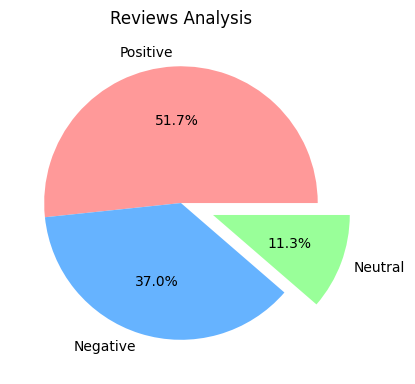

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline

# Define the data for the pie chart
labels = vader_counts.index
counts = vader_counts.values

# Define custom colors for each category (positive, negative, and neutral)
# You can replace these colors with any colors of your choice using valid color representations (e.g., 'red', 'blue', '#00ff00', etc.).
colors = ['#ff9999', '#66b3ff', '#99ff99']

plt.figure(figsize=(15, 7))

# Plot the pie chart
plt.subplot(1, 3, 2)
plt.title("Reviews Analysis")
plt.pie(counts, labels=labels, explode=(0, 0, 0.25), autopct='%1.1f%%', colors=colors, shadow=False)

# Show the pie chart
plt.show()


## **Text Visualization with Word Cloud and Bar Chart: Analyzing Most Common Words in the Textual Data**

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Drop rows with missing values in the 'Lemma' column and reset the index
df.dropna(subset=['Lemma'], inplace=True)
df.reset_index(drop=True, inplace=True)

# Function to show word cloud
def show_wordcloud(data):
    stopwords = set(STOPWORDS)

    # Generate word cloud
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1
    ).generate(str(data))

    # Plot the word cloud
    plt.figure(figsize=(12, 12))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.title('Word Cloud')
    plt.show()

# Function to show bar chart for most common words
def show_barchart(data):
    stopwords = set(STOPWORDS)

    # Generate word cloud to extract most common words and their frequencies
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1
    ).generate(str(data))

    # Extract the most common words and their counts from the word cloud data
    word_freq = wordcloud.process_text(str(data))
    common_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:10]
    common_words_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

    # Plot the bar chart for the most common words
    plt.figure(figsize=(10, 6))
    plt.bar(common_words_df['Word'], common_words_df['Frequency'], color='skyblue')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title('Most Common Words')
    plt.xticks(rotation=45, ha='right')
    plt.show()

## **Visualizing Textual Data with Word Cloud: Analyzing Word Frequency through Word Cloud Visualization**

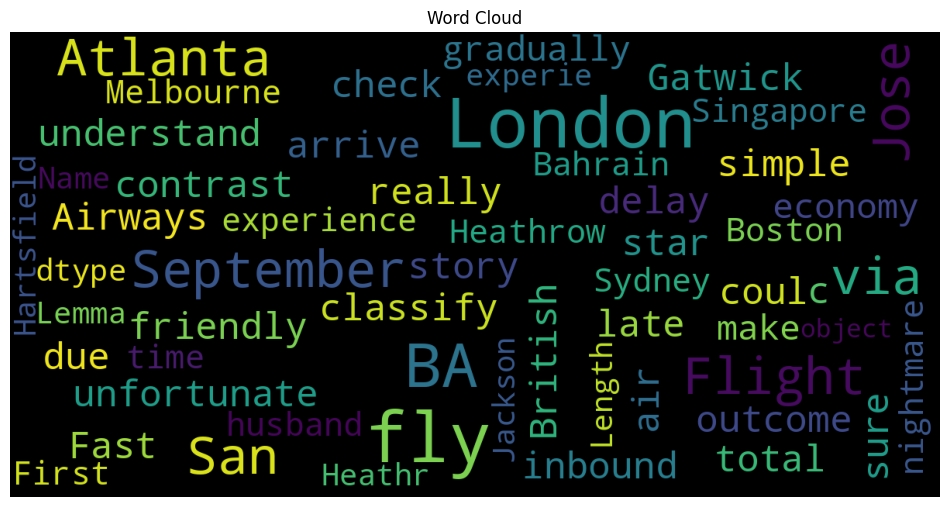

In [72]:
# Call the function to show word cloud
show_wordcloud(df['Lemma'])

## **Visualizing Most Common Words with Bar Chart: Analyzing Word Frequency in Textual Data**

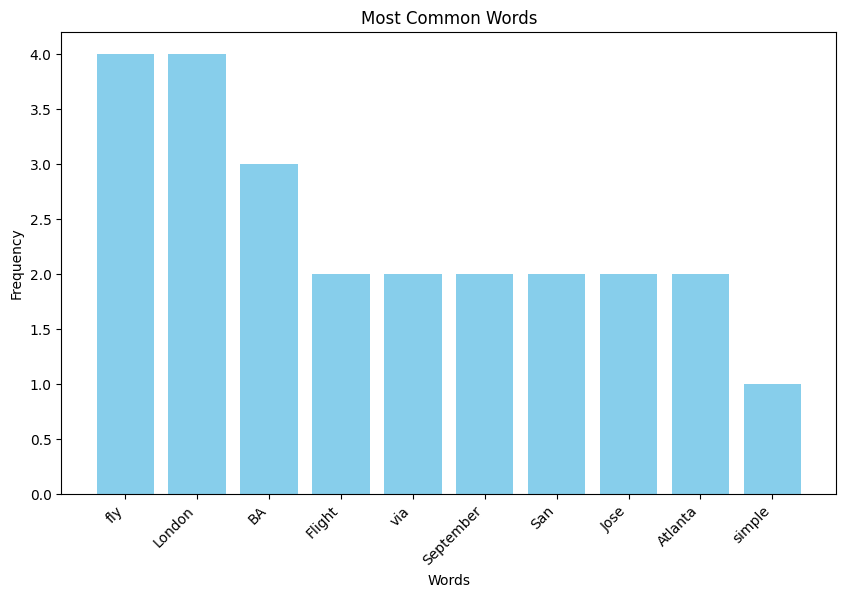

In [73]:

# Call the function to show bar chart for most common words
show_barchart(df['Lemma'])